In [2]:
from main import *

Datei öffnen:

In [3]:
audio_arr, sr = openFile(r"..\viblib\v-09-10-12-2.wav")

File ..\viblib\v-09-10-12-2.wav exists.


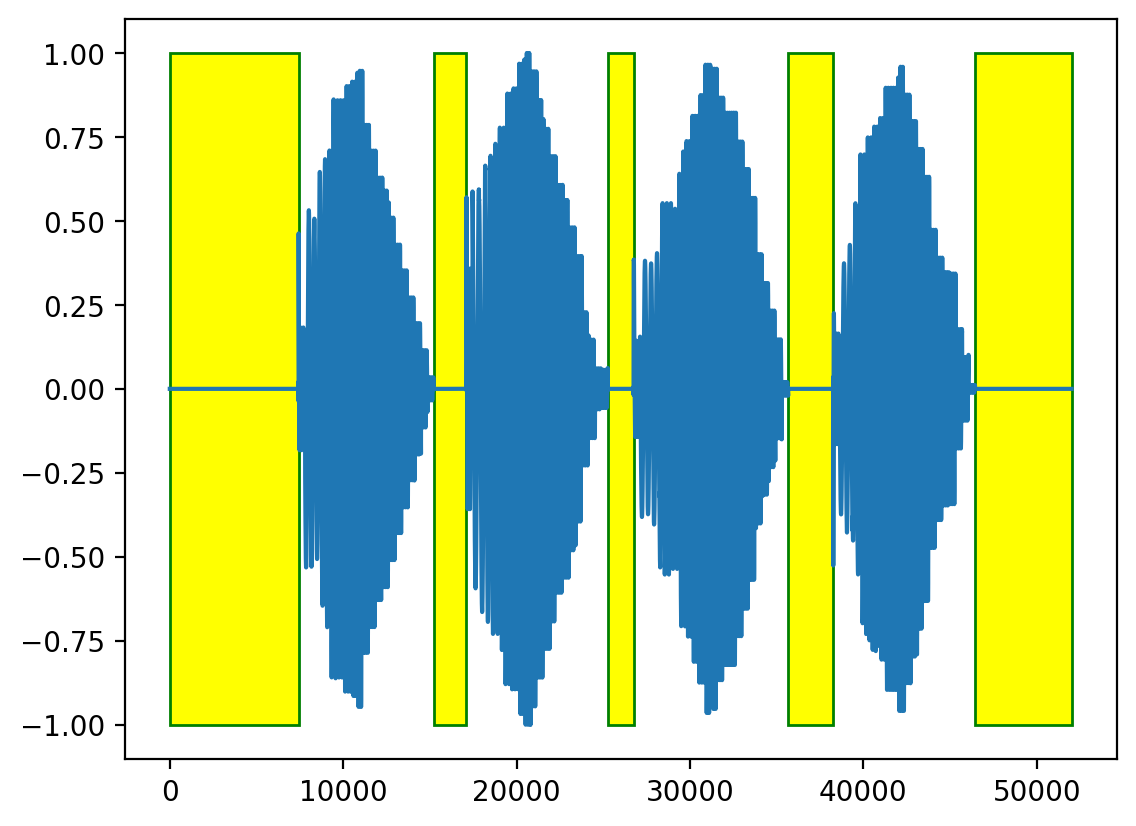

In [4]:
breaks_list = findBreaks(audio_arr=audio_arr, sr=sr) #findet Pausen in Audio Array

# Amplituden berechnen

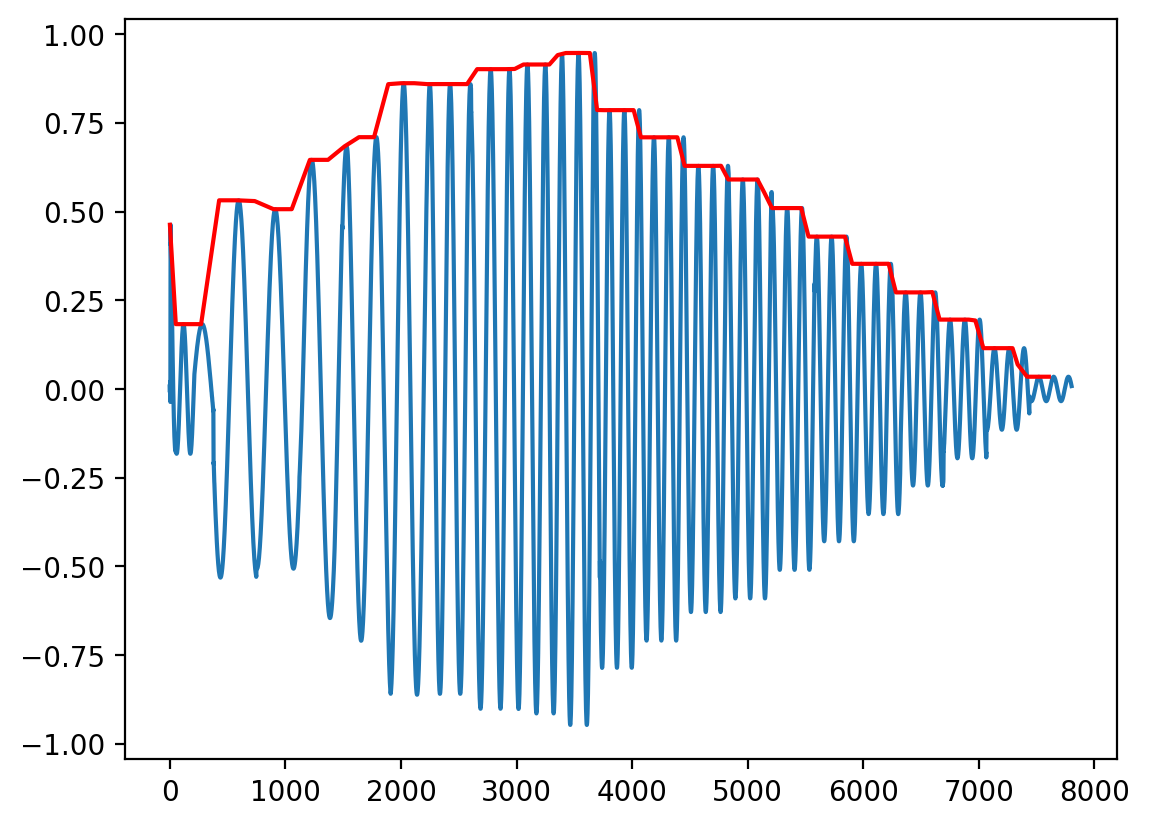

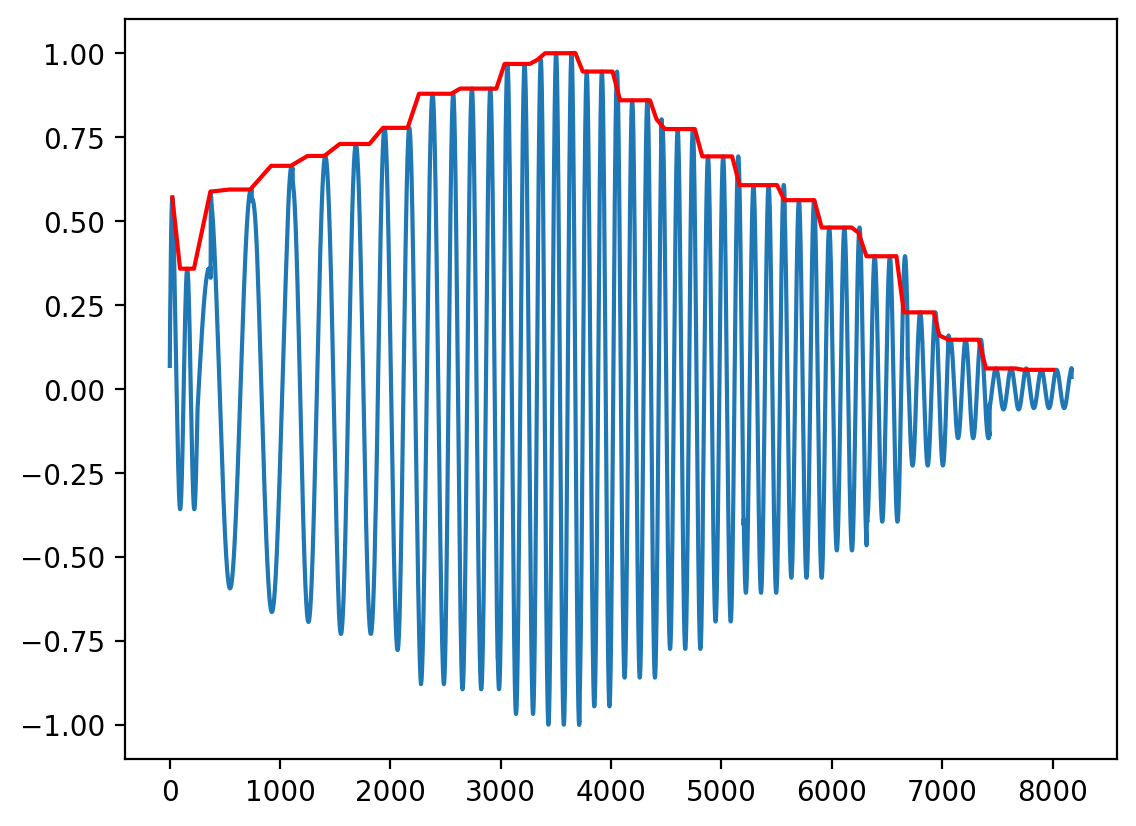

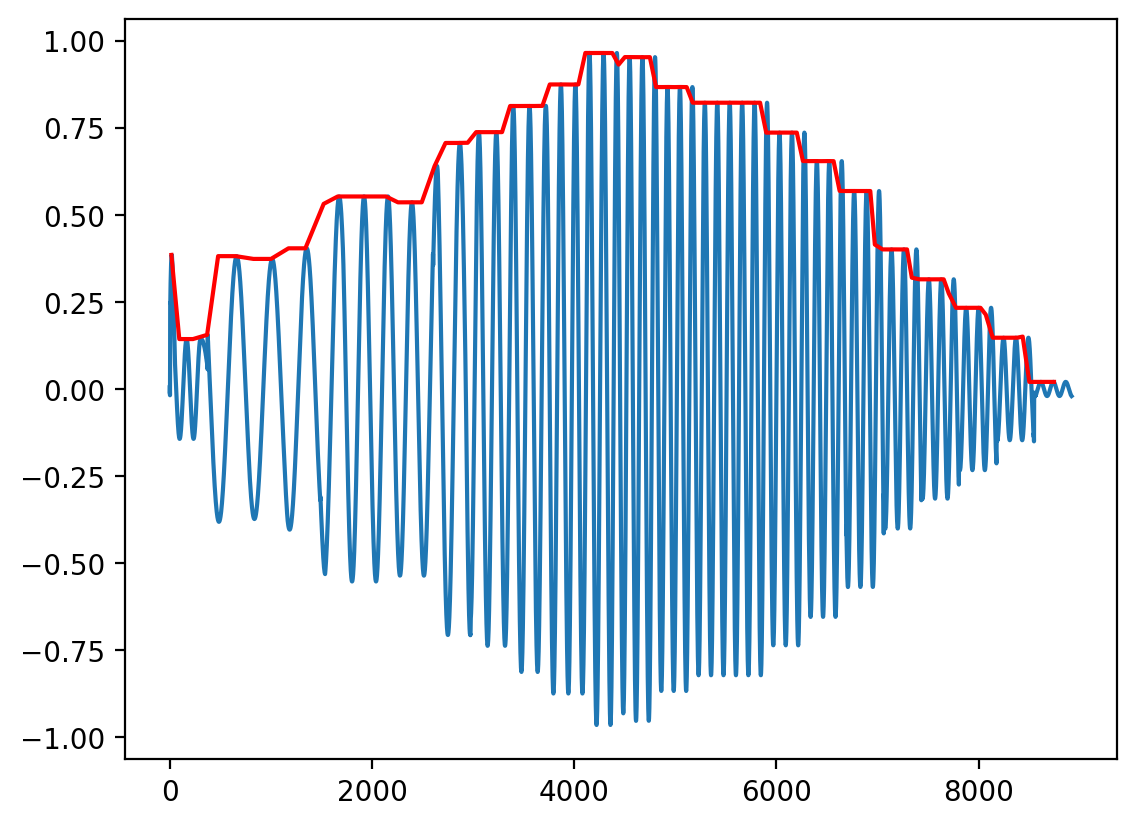

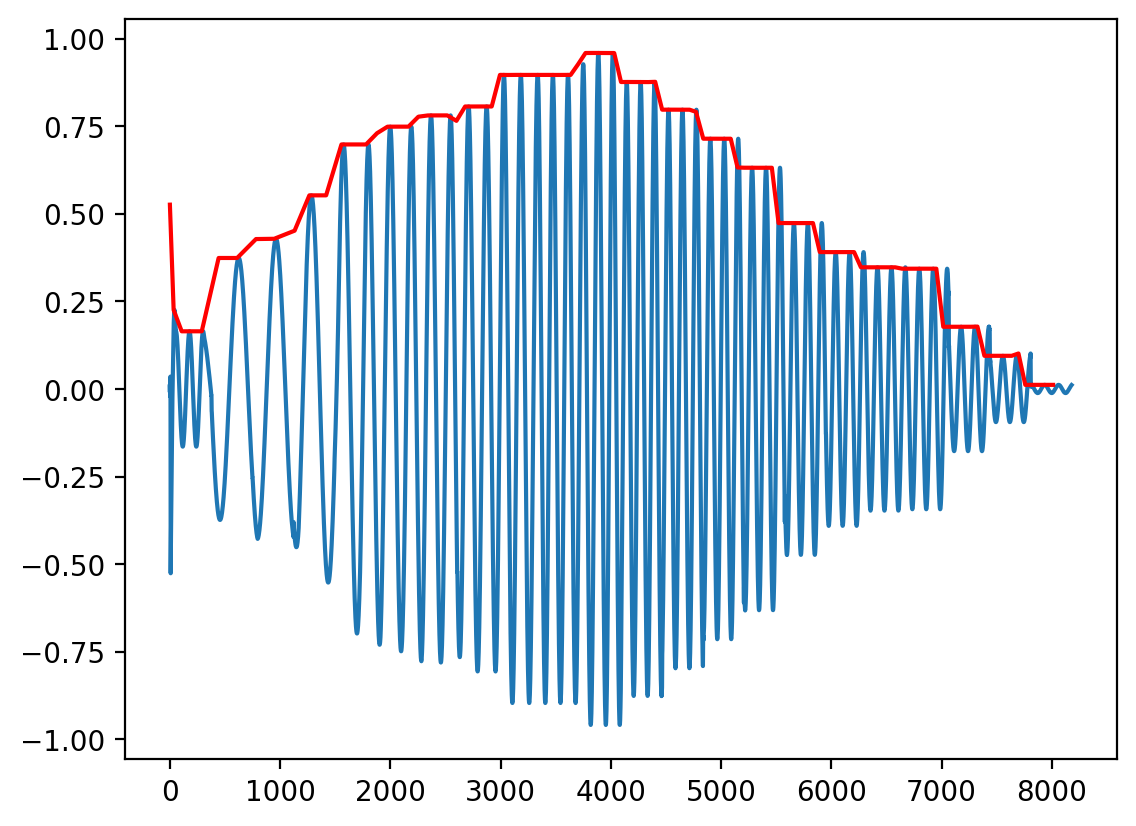

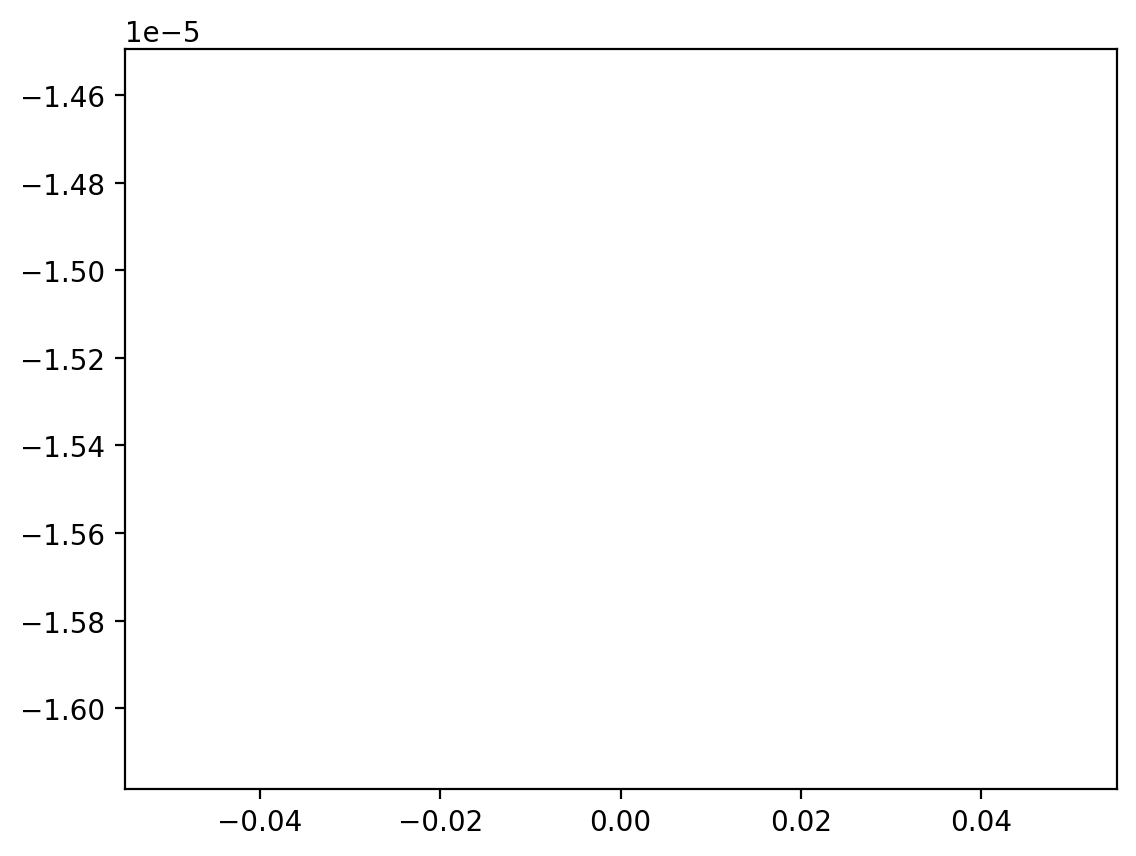

In [5]:
audio_arr_list = splitAudioArrAtBreaks(audio_arr=audio_arr, breaksList=breaks_list)
amplitudes = []
for audio in audio_arr_list:
  amplitudes.append(getAmplitudes(audio,sr=sr))

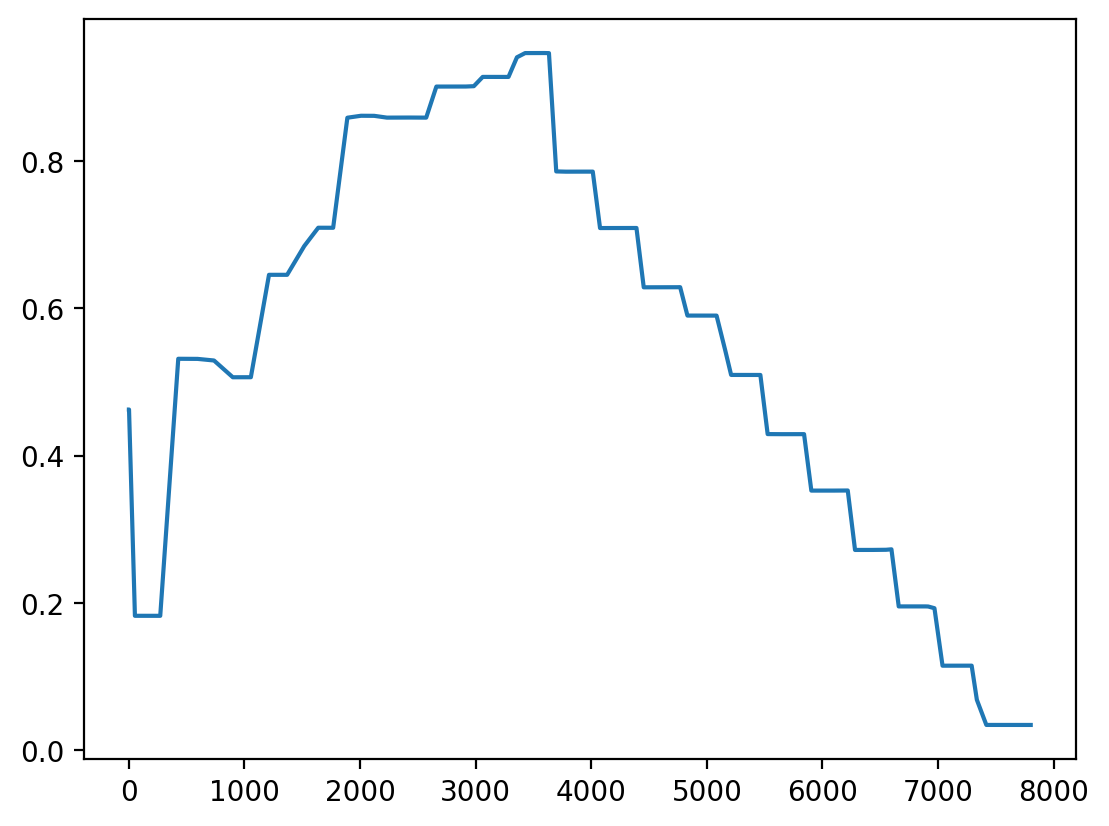

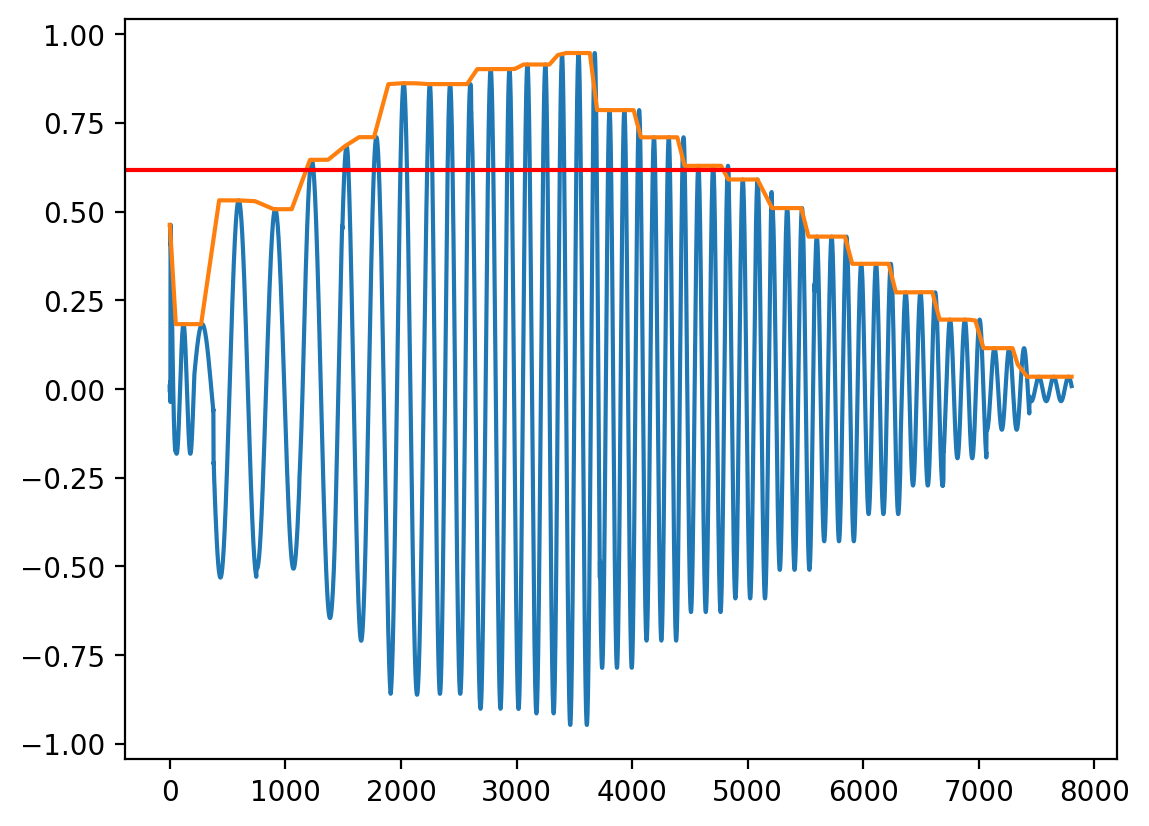

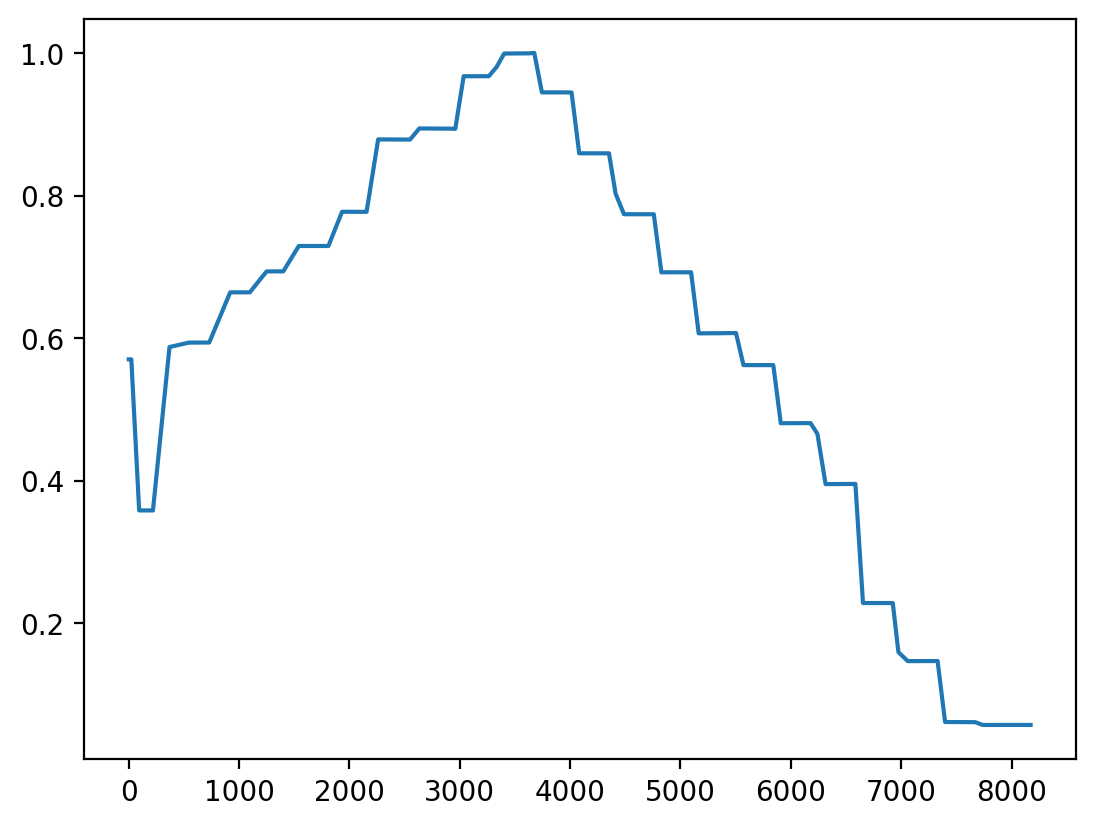

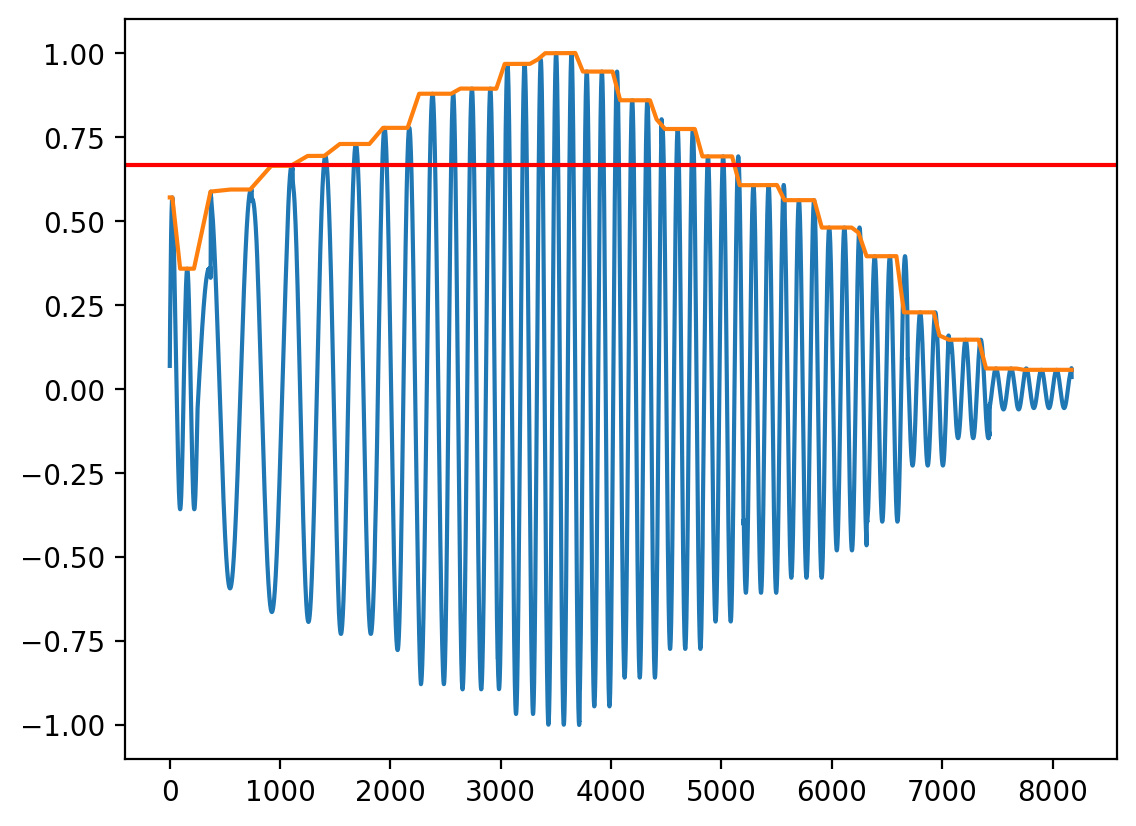

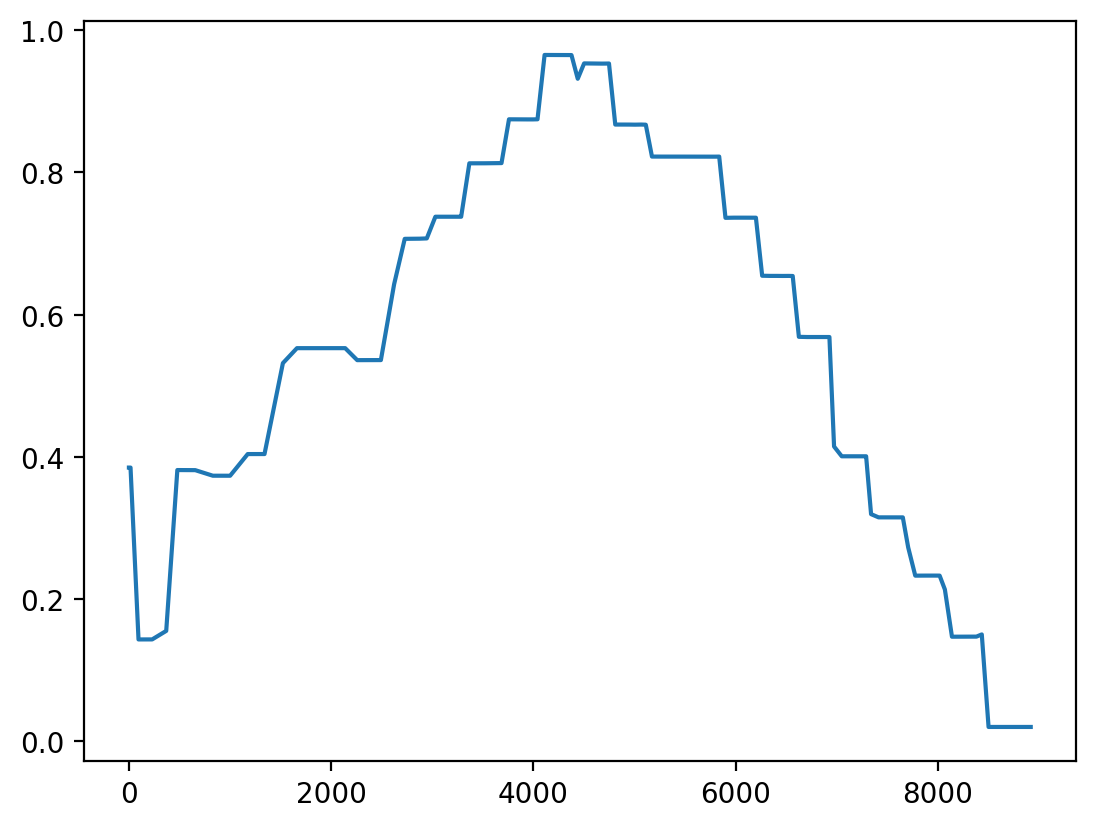

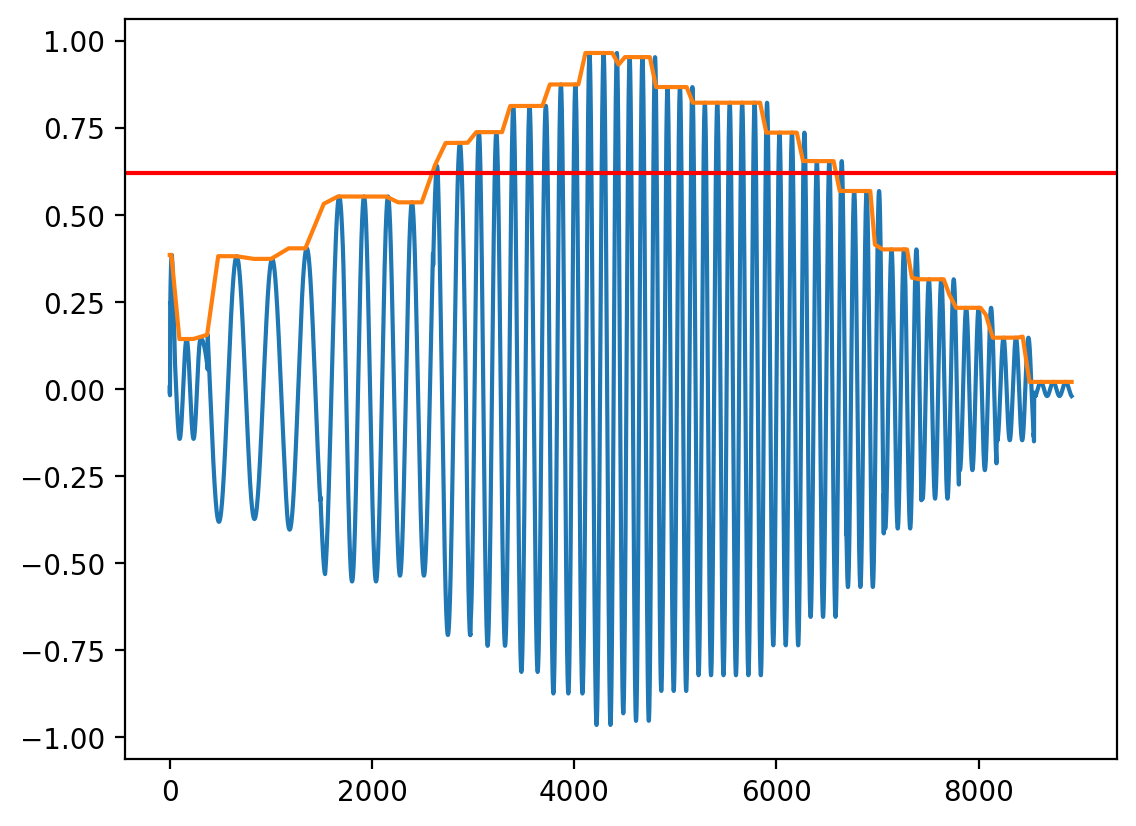

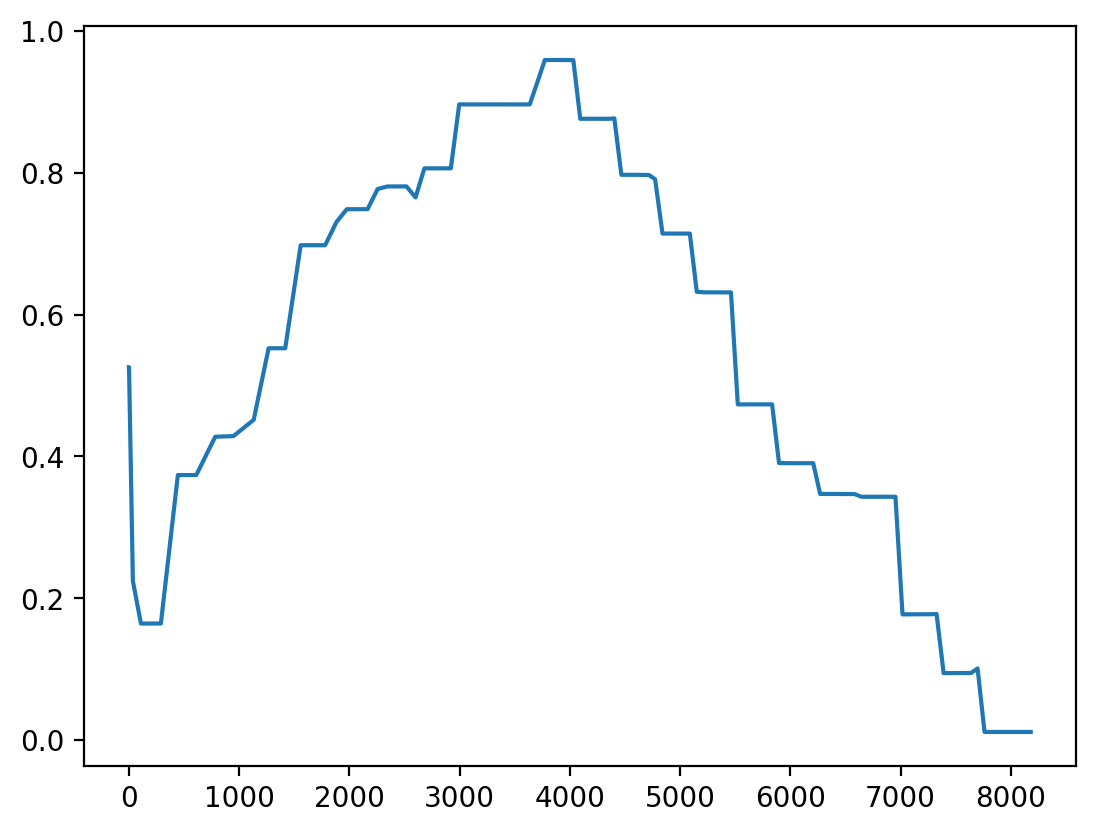

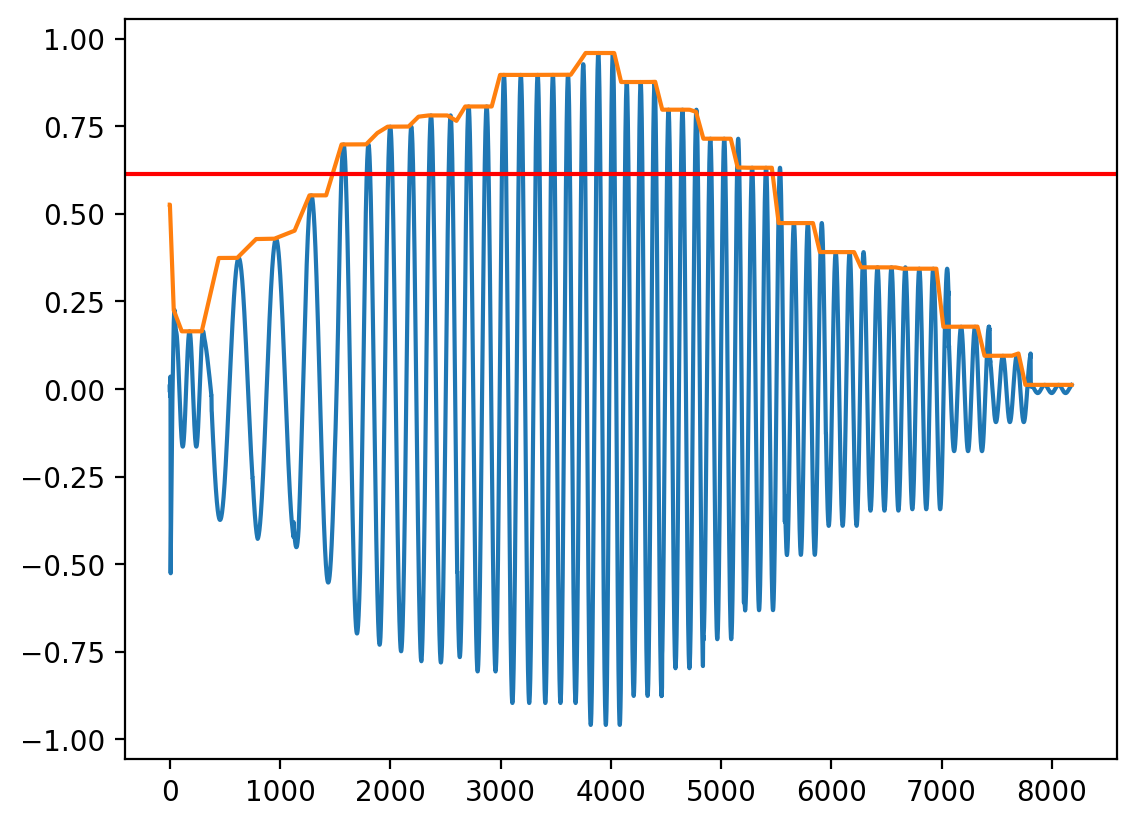

In [6]:
for i in range(0,len(amplitudes)):
    if amplitudes[i] is not None and len(amplitudes[i]) > 0:
        interpolated = interpolate(amplitudes[i], len(audio_arr_list[i]))
        arms = rms(interpolated)
        plt.figure(1000 + i)
        plt.plot(audio_arr_list[i])
        plt.plot(interpolated)
        plt.axhline(arms, color="red")


# Frequenzerkennung

frequency 16
len(audio) (7803,)
Frequenz:  112.58148
S (1025, 16)
frequency 16
len(audio) (8174,)
Frequenz:  112.1251
S (1025, 16)
frequency 18
len(audio) (8920,)
Frequenz:  113.27126
S (1025, 18)
frequency 16
len(audio) (8181,)
Frequenz:  113.58998
S (1025, 16)


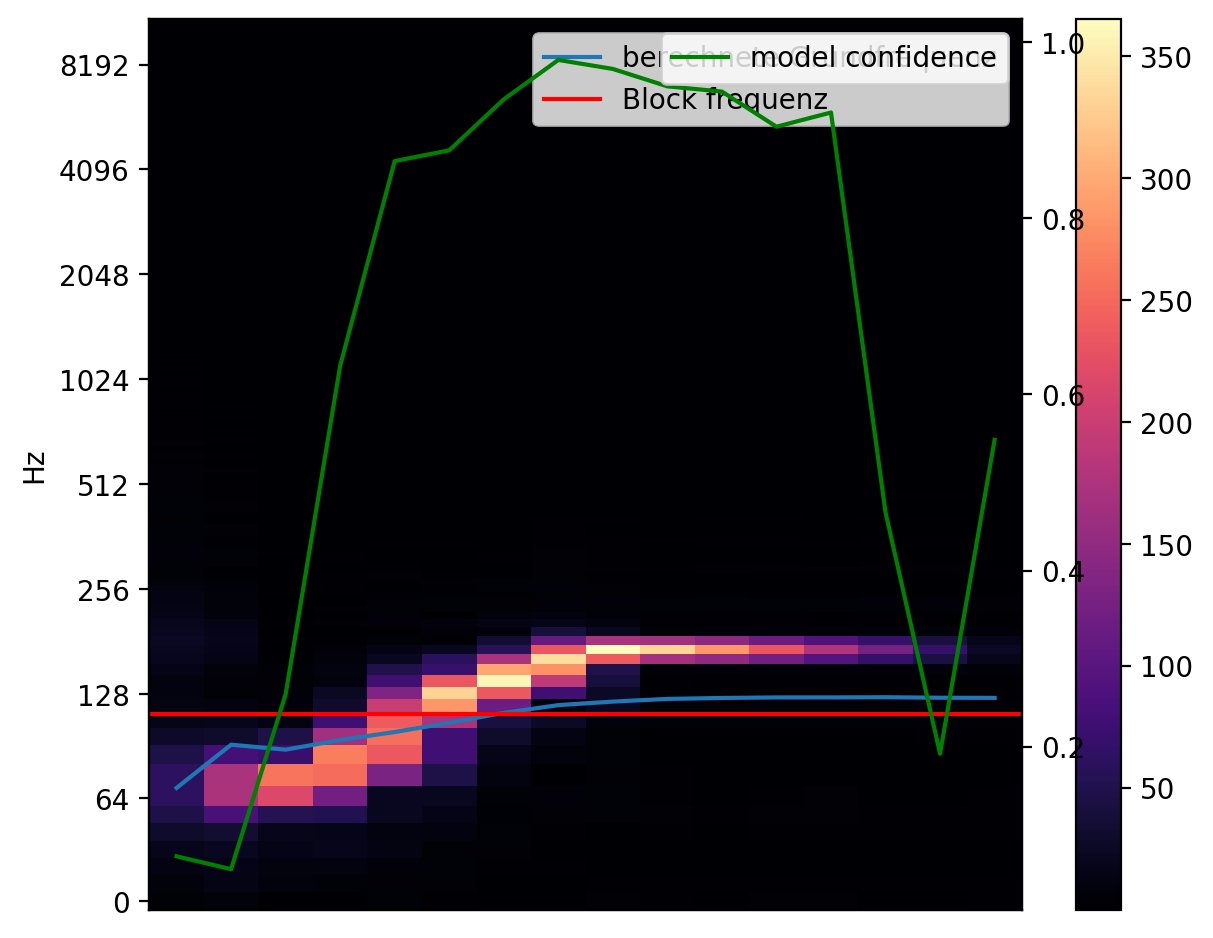

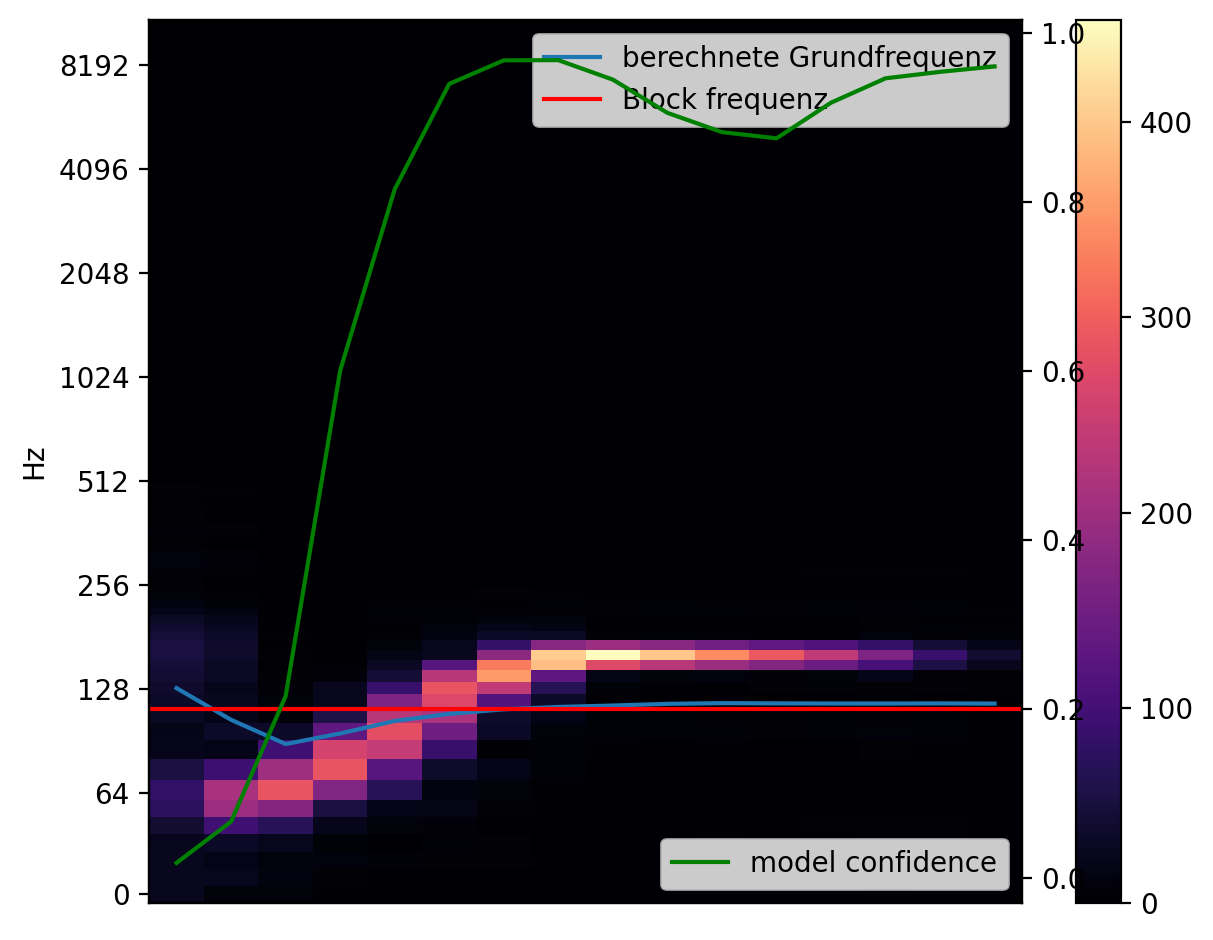

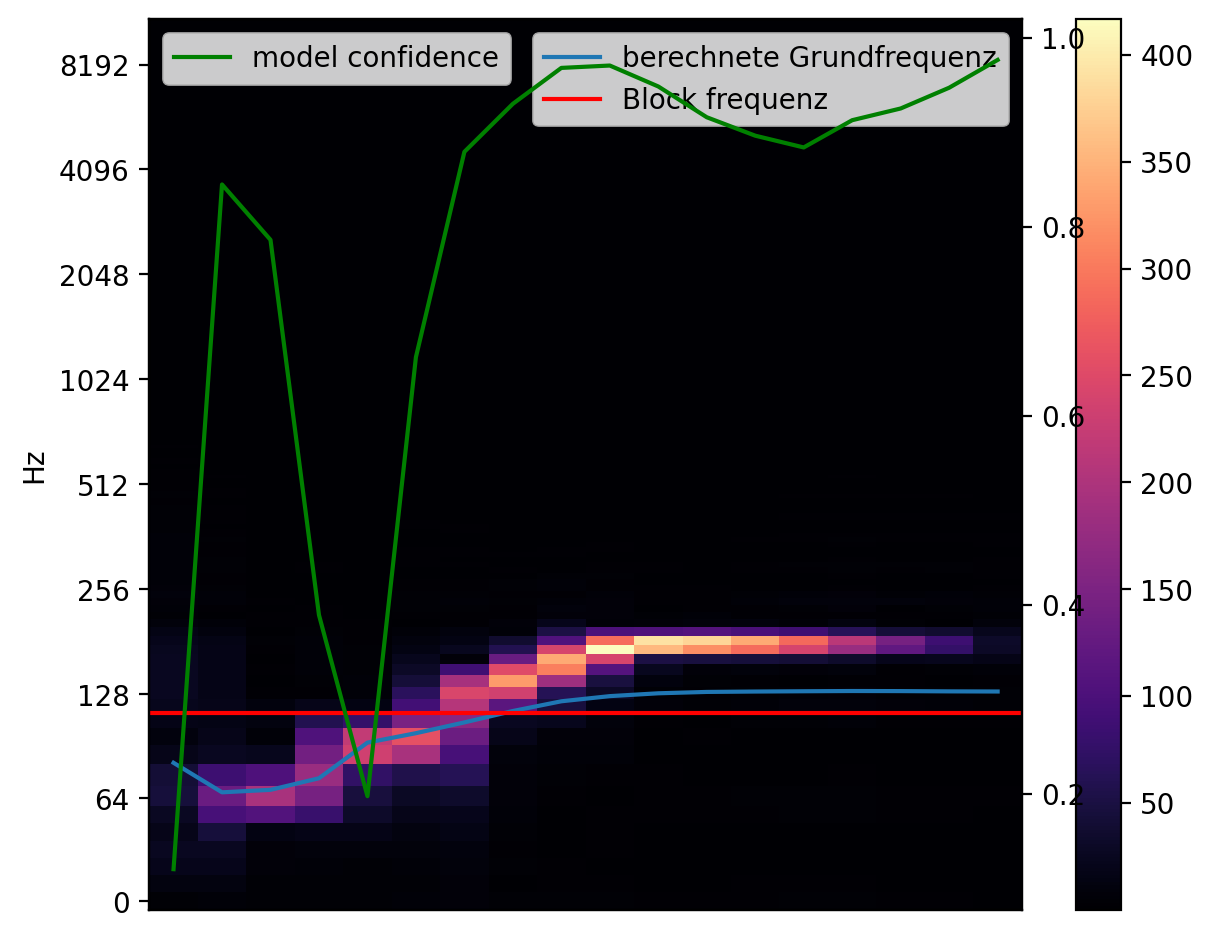

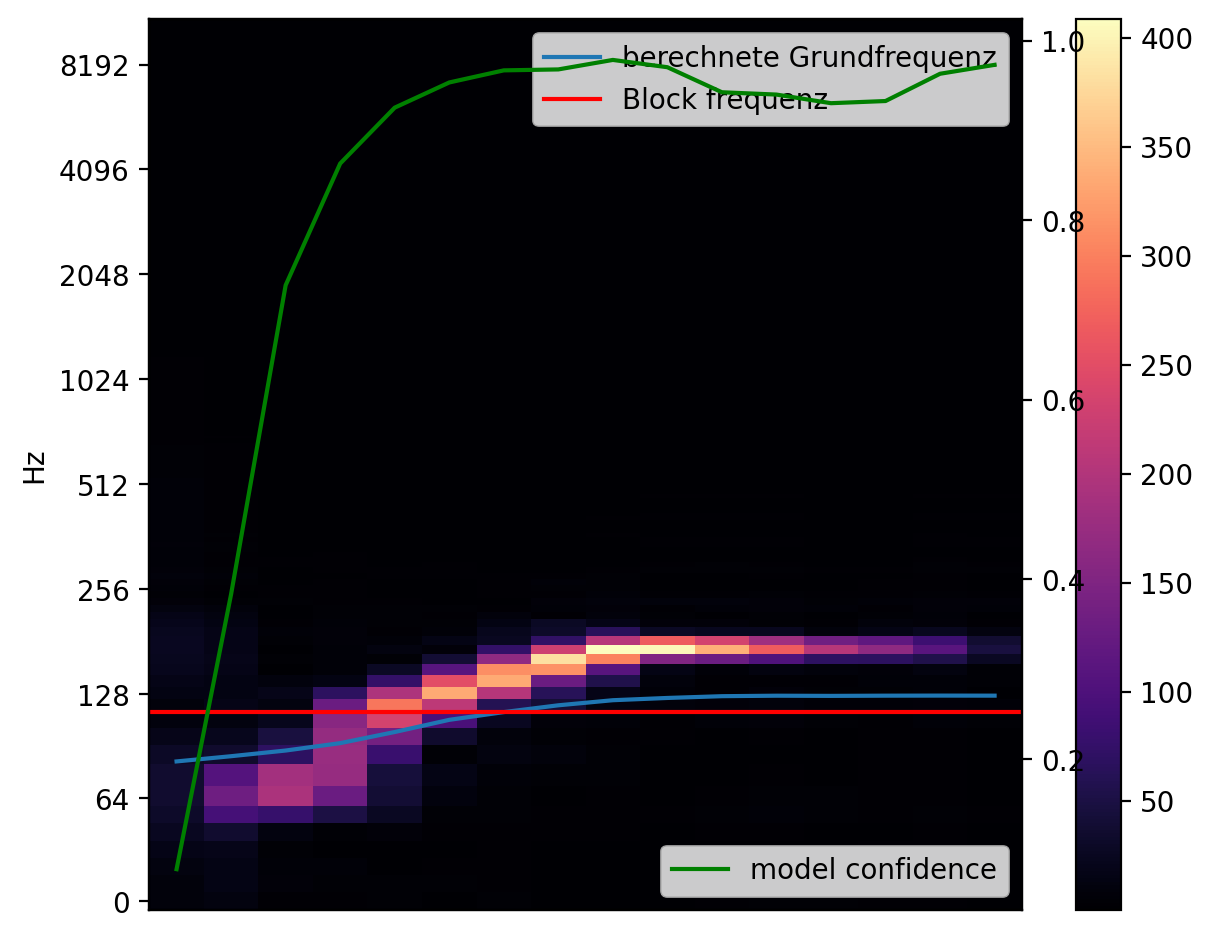

In [55]:
from aiBasefrequency import *
import librosa

i = 0
for audio in audio_arr_list:
    if amplitudes[i] is not None and len(amplitudes[i]) > 0:
        plt.figure(2000 + i)

        frequency,unconfidence = getFrequencies(audio,sr=sr)
        confidence = 1 - unconfidence

        print("frequency", len(frequency))
        print("len(audio)", audio.shape)

        frequency = outputTooHz(frequency)
        #times =numpy.arange(0, len(audio)-1, len(audio)/len(frequency))
        plt.plot(frequency, label="berechnete Grundfrequenz")
        frequency = rms(frequency)
        print("Frequenz: ", frequency)

        S = numpy.abs(librosa.stft(audio))
        print("S", S.shape)
        img = librosa.display.specshow(S, y_axis='log')
        plt.colorbar()
        plt.tight_layout()
        plt.axhline(frequency, color="red", label = "Block frequenz")
        plt.legend()
        plt.twinx()
        plt.plot(confidence, color="green", label="model confidence")
        plt.legend()
   
        i += 1

    